In [136]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [137]:
dataset = pd.read_csv("kidney_data.csv")

dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [138]:

dataset = dataset.drop('id', axis=1)

In [139]:
# Shape of dataset:
dataset.shape

(400, 25)

In [140]:

dataset.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [141]:

dataset.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [142]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [143]:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

**Replacing Categorical values with numbers:**

In [144]:
dataset['rbc'].value_counts()


normal      201
abnormal     47
Name: rbc, dtype: int64

In [145]:
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


In [146]:
dataset['pc'].value_counts()


normal      259
abnormal     76
Name: pc, dtype: int64

In [147]:
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


In [148]:
dataset['pcc'].value_counts()


notpresent    354
present        42
Name: pcc, dtype: int64

In [149]:
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})


In [150]:
dataset['ba'].value_counts()


notpresent    374
present        22
Name: ba, dtype: int64

In [151]:
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})


In [152]:
dataset.drop('sg', axis=1, inplace=True)
dataset.drop('htn', axis=1, inplace=True)

In [153]:
dataset['dm'].value_counts()


no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [154]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})


In [155]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [156]:
dataset['cad'].value_counts()


no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [157]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})


In [158]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [159]:
dataset['appet'].unique()


array(['good', 'poor', nan], dtype=object)

In [160]:
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})


In [161]:
dataset['pe'].value_counts()


no     323
yes     76
Name: pe, dtype: int64

In [162]:
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [163]:
dataset['ane'].value_counts()


no     339
yes     60
Name: ane, dtype: int64

In [164]:
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [165]:
dataset['classification'].value_counts()


ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [166]:
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})


In [167]:
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]


In [168]:
dataset.head()


,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,rc,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,...,15.4,44,7800,5.2,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,...,11.3,38,6000,NaN,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,...,9.6,31,7500,NaN,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,...,11.2,32,6700,3.9,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,...,11.6,35,7300,4.6,0.0,0.0,1.0,0.0,0.0,1


In [169]:

dataset.dtypes

age               float64
bp                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [170]:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [171]:

dataset.dtypes

age               float64
bp                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [172]:

dataset.describe()

,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,rc,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,...,348.000000,329.000000,294.000000,269.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,57.425722,...,12.526437,38.884498,8406.122449,4.707435,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,...,2.912587,8.990105,2944.474190,1.025323,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,...,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,...,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,...,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,...,15.000000,45.000000,9800.000000,5.400000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,...,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
dataset.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Handling Null Values:**


In [174]:
dataset.columns


Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

In [175]:

features = ['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'dm', 'cad', 'appet', 'pe',
       'ane']


In [176]:
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].mean())

In [177]:
dataset.isnull().any().sum()


0

**Heatmap**

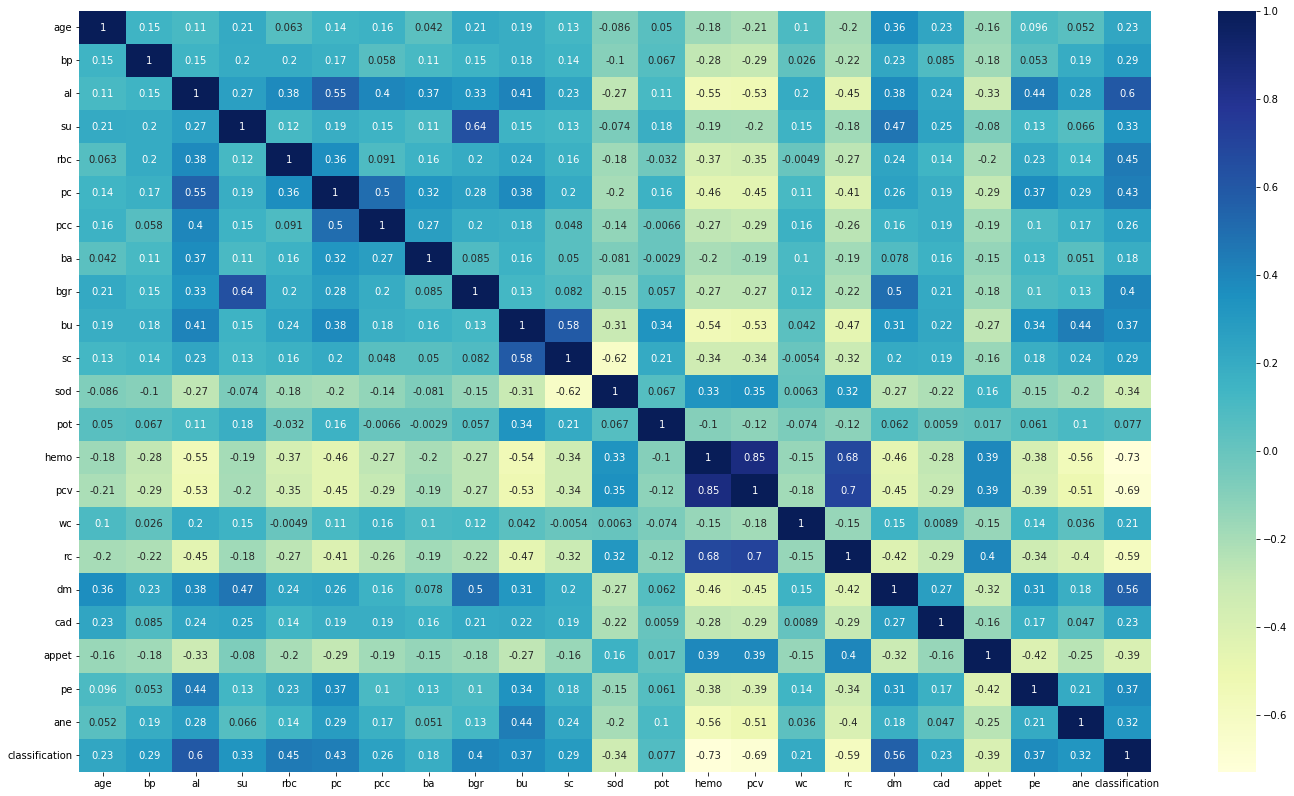

In [178]:

plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [179]:
dataset.drop('pcv', axis=1, inplace=True)


In [180]:
dataset.head()


,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,...,pot,hemo,wc,rc,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.0,0.0,0.189516,0.0,0.0,0.0,121.000000,36.0,...,4.627244,15.4,7800.0,5.200000,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,4.0,0.0,0.189516,0.0,0.0,0.0,148.036517,18.0,...,4.627244,11.3,6000.0,4.707435,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,2.0,3.0,0.000000,0.0,0.0,0.0,423.000000,53.0,...,4.627244,9.6,7500.0,4.707435,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,4.0,0.0,0.000000,1.0,1.0,0.0,117.000000,56.0,...,2.500000,11.2,6700.0,3.900000,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,2.0,0.0,0.000000,0.0,0.0,0.0,106.000000,26.0,...,4.627244,11.6,7300.0,4.600000,0.0,0.0,1.0,0.0,0.0,1


<AxesSubplot:xlabel='classification', ylabel='count'>

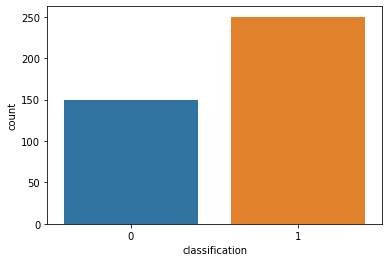

In [181]:
sns.countplot(dataset['classification'])

In [182]:

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [183]:
X.head()


,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,...,sod,pot,hemo,wc,rc,dm,cad,appet,pe,ane
0,48.0,80.0,1.0,0.0,0.189516,0.0,0.0,0.0,121.000000,36.0,...,137.528754,4.627244,15.4,7800.0,5.200000,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,4.0,0.0,0.189516,0.0,0.0,0.0,148.036517,18.0,...,137.528754,4.627244,11.3,6000.0,4.707435,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,2.0,3.0,0.000000,0.0,0.0,0.0,423.000000,53.0,...,137.528754,4.627244,9.6,7500.0,4.707435,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,4.0,0.0,0.000000,1.0,1.0,0.0,117.000000,56.0,...,111.000000,2.500000,11.2,6700.0,3.900000,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,2.0,0.0,0.000000,0.0,0.0,0.0,106.000000,26.0,...,137.528754,4.627244,11.6,7300.0,4.600000,0.0,0.0,1.0,0.0,0.0


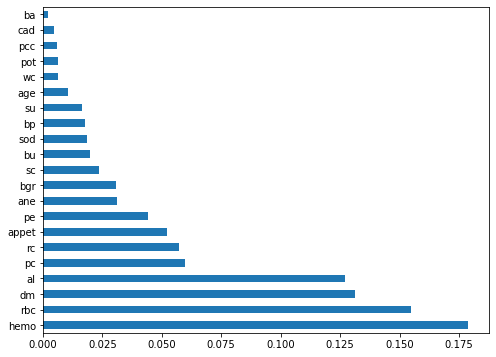

In [184]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [119]:
ranked_features.nlargest(8).index


Index(['al', 'rbc', 'hemo', 'dm', 'rc', 'pc', 'appet', 'pe'], dtype='object')

In [120]:
X = dataset[[ 'rbc','dm','hemo','pc','al','appet']]


In [121]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [122]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [123]:
print(X_train.shape)
print(X_test.shape)

(280, 6)
(120, 6)


In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

In [125]:
from sklearn.svm import SVC
#Main Model
svm= SVC(kernel = 'linear', random_state = 0)
svm=svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.925
[[54  4]
 [ 5 57]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        58
           1       0.93      0.92      0.93        62

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



In [126]:
#just for checking with another kernel type accuarcy 
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm=ksvm.fit(X_train, y_train)

y_pred = ksvm.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)


Accuracy: 0.9083333333333333
[[52  6]
 [ 5 57]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        58
           1       0.90      0.92      0.91        62

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



In [127]:
def take_user_input():
    print("Enter the 6 values one by one:")
    value1 = float(input("RBC : "))
    value2 = float(input("Diabetes Mellitus: "))
    value3 = float(input("Hemoglobin: "))
    value4 = float(input("Pus Cell: "))
    value5 = float(input("Albumin Disorder Severity: "))
    value6 = float(input("Appet: "))
    return [value1, value2, value3, value4, value5, value6]

def predict_result(input_data):
    result = svm.predict([input_data]) 
    return result

def main():
    user_input = take_user_input()
    
    predicted_result = predict_result(user_input)
    
    print("Predicted Result:", predicted_result[0])

if __name__ == "__main__":
    main()


Enter the 6 values one by one:
RBC : 0
Diabetes Mellitus: 0
Hemoglobin: 0
Pus Cell: 0
Albumin Disorder Severity: 0
Appet: 0
Predicted Result: 1
